In [20]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

In [28]:
cfg = load_config("../configs/improved_config.py")
logs = tops.logger.read_logs(pathlib.Path("../outputs/improved_config"))

Saving SSD outputs to: outputs/


In [29]:
# The log is formatted as a list of dictionaries
print(logs[:10])
print(logs[:])

[{'amp/grad_scale': 32768.0, 'global_step': 0}, {'loss/regression_loss': 7.615155220031738, 'loss/classification_loss': 27.727081298828125, 'loss/total_loss': 35.34223556518555, 'global_step': 0}, {'stats/learning_rate': 8.144e-05, 'global_step': 1}, {'stats/learning_rate': 8.288e-05, 'global_step': 2}, {'stats/learning_rate': 8.432e-05, 'global_step': 3}, {'stats/learning_rate': 8.576e-05, 'global_step': 4}, {'stats/learning_rate': 8.720000000000002e-05, 'global_step': 5}, {'stats/learning_rate': 8.864000000000002e-05, 'global_step': 6}, {'stats/learning_rate': 9.008000000000002e-05, 'global_step': 7}, {'stats/learning_rate': 9.152e-05, 'global_step': 8}]
[{'amp/grad_scale': 32768.0, 'global_step': 0}, {'loss/regression_loss': 7.615155220031738, 'loss/classification_loss': 27.727081298828125, 'loss/total_loss': 35.34223556518555, 'global_step': 0}, {'stats/learning_rate': 8.144e-05, 'global_step': 1}, {'stats/learning_rate': 8.288e-05, 'global_step': 2}, {'stats/learning_rate': 8.432e

In [30]:
# We are saving logs to disk every 10th iteration, thus we need to filter out all entries without a loss
loss_entries = [entry for entry in logs if "loss/regression_loss" in entry]

2480


Text(0.5, 0, 'Global step (number of batches trained on)')

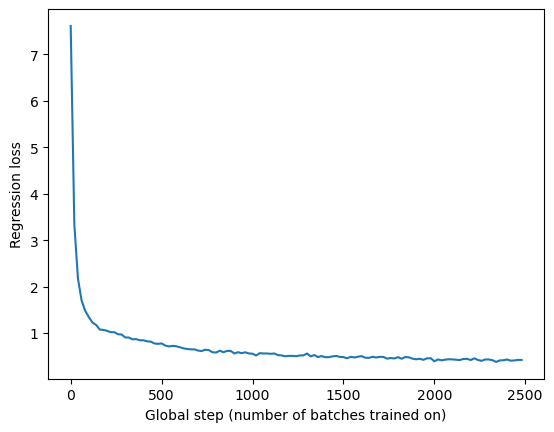

In [32]:
steps = [entry["global_step"] for entry in loss_entries]
loss = [entry["loss/regression_loss"] for entry in loss_entries]
both = steps
loss = loss

test = [lose for step, lose in zip(steps, loss) if step<6000]
steps = [step for step in steps if step<6000]

plt.plot(steps, test)
plt.ylabel("Regression loss")
plt.xlabel("Global step (number of batches trained on)")

